┌───┐                                                          »
q_0: ──────┤ H ├────────────■─────────────────────────────────────────────»
           ├───┤            │                                             »
q_1: ──────┤ H ├────────────┼────────────■────────────■───────────────────»
           ├───┤            │            │            │                   »
q_2: ──────┤ H ├────────────┼────────────┼────────────┼────────────■──────»
           ├───┤            │            │            │            │      »
q_3: ──────┤ H ├────────────┼────────────┼────────────┼────────────┼──────»
           ├───┤            │            │            │            │      »
q_4: ──────┤ H ├────────────┼────────────┼────────────┼────────────┼──────»
     ┌─────┴───┴─────┐┌─────┴─────┐┌─────┴─────┐┌─────┴─────┐┌─────┴─────┐»
q_5: ┤ U(π,3.3995,0) ├┤ P(3.3995) ├┤ P(3.3995) ├┤ P(3.3995) ├┤ P(3.3995) ├»
     └───────────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
c: 5/═════════════════════════════════════════════════════════════════════»
                                                                          »
«                                                                      »
«q_0: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«q_1: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«q_2: ──────■────────────■────────────■────────────────────────────────»
«           │            │            │                                »
«q_3: ──────┼────────────┼────────────┼────────────■────────────■──────»
«           │            │            │            │            │      »
«q_4: ──────┼────────────┼────────────┼────────────┼────────────┼──────»
«     ┌─────┴─────┐┌─────┴─────┐┌─────┴─────┐┌─────┴─────┐┌─────┴─────┐»
«q_5: ┤ P(3.3995) ├┤ P(3.3995) ├┤ P(3.3995) ├┤ P(3.3995) ├┤ P(3.3995) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 5/═════════════════════════════════════════════════════════════════»
«                                                                      »
«                                                                      »
«q_0: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«q_1: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«q_2: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«q_3: ──────■────────────■────────────■────────────■────────────■──────»
«           │            │            │            │            │      »
«q_4: ──────┼────────────┼────────────┼────────────┼────────────┼──────»
«     ┌─────┴─────┐┌─────┴─────┐┌─────┴─────┐┌─────┴─────┐┌─────┴─────┐»
«q_5: ┤ P(3.3995) ├┤ P(3.3995) ├┤ P(3.3995) ├┤ P(3.3995) ├┤ P(3.3995) ├»
«     └───────────┘└───────────┘└───────────┘└───────────┘└───────────┘»
«c: 5/═════════════════════════════════════════════════════════════════»
«                                                                      »
«                                                                      »
«q_0: ─────────────────────────────────────────────────────────────────»
«                                                                      »
«q_1: ───────────────────X─────────────────────────────────────────────»
«                        │                                             »
«q_2: ───────────────────┼─────────────────────────────────────────────»
«                        │                                             »
«q_3: ──────■────────────X─────────────────────────────────────────────»
«           │                                                          »
«q_4: ──────┼───────────

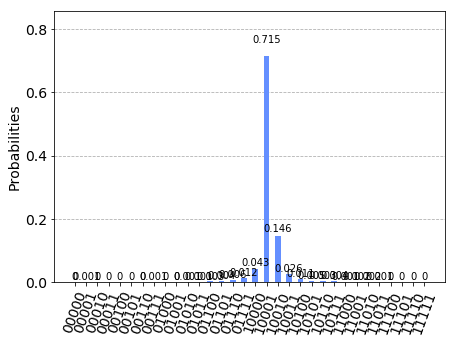

Measured phi = 30.438382859375 degrees (Actual input phi: 31 degrees)


In [4]:
# Exercise 1, problem 1: Measure relative phase phi.
import matplotlib.pyplot as plt
import numpy as np
import math
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.visualization import plot_histogram

#input fii in degrees
phi = 31
theta = math.pi
lamda = 0

#resolution and presicion
qubs=5
shots = 4096

# Create and set up circuit
qpe3 = QuantumCircuit(qubs+1, qubs)

# Apply H-Gates to counting qubits:
for qubit in range(qubs):
    qpe3.h(qubit)
    
# Prepare input state    
angle = (2*math.pi)*(phi/57.2957795)
qpe3.u(theta,angle,0,qubs)

# Controlled-U operations:
repetitions = 1
for counting_qubit in range(qubs):
    for i in range(repetitions):
        qpe3.cp(angle, counting_qubit, qubs);
    repetitions *= 2

# Inverse QFT:
for qubit in range(qubs//2):
    qpe3.swap(qubit, qubs-qubit-1)
for j in range(qubs):
    for m in range(j):
        qpe3.cp(-math.pi/float(2**(j-m)), m, j)
    qpe3.h(j)

# Measure relative phase
qpe3.barrier()
for n in range(qubs):
    qpe3.measure(n,n) 

# Execute circuit   
answer = execute(qpe3, backend=Aer.get_backend('qasm_simulator'), shots=shots).result().get_counts()
measured_str = max(answer, key=answer.get)
measured_int = int(measured_str,2)

# Display results
display(qpe3.draw())
display(plot_histogram(answer))
print("Measured phi =", (measured_int/(2**qubs))*57.2957795,"degrees","(Actual input phi:",phi,"degrees)")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).


┌───┐┌─────────┐┌───┐┌───┐┌─────────┐
q_0: ┤ H ├┤ RZ(π/3) ├┤ H ├┤ S ├┤ RZ(π/3) ├
     └───┘└─────────┘└───┘└───┘└─────────┘

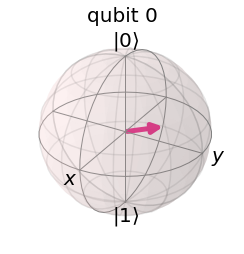

┌───────────────┐
q_0: ┤ U3(π/3,π/3,0) ├
     └───────────────┘

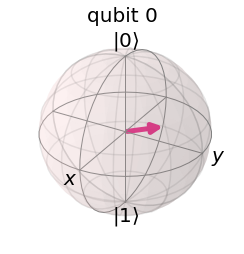

In [5]:
# Exercise 1, problem 2: Implement U3 with X,S,H and Rz.
from qiskit import *
import math
from math import pi
from qiskit.visualization import plot_bloch_multivector

# Coefficients
theta = math.pi/3
phi = math.pi/3
lamda = 0

# Own U3 implementation
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(theta,0)
qc.h(0)
qc.s(0)
qc.rz(phi,0)

# IBMQ U3
qc2 = QuantumCircuit(1)
qc2.u3(theta,phi,lamda,0)

# Execute circuits
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
out2 = execute(qc2,backend).result().get_statevector()

# Display own U3
display(qc.draw())
display(plot_bloch_multivector(out))

# Display built in U3
display(qc2.draw())
display(plot_bloch_multivector(out2))

In [6]:
# Exercise 1, problem 3: Proof identities.
import sympy
from sympy import *
from sympy import I
from sympy.physics.quantum import TensorProduct
init_printing(use_unicode=True)
lambda_ = symbols('lambda')

# Matrices
H = (1/sympy.sqrt(2))*Matrix([[1,1],[1,-1]])
X = Matrix([[0,1],[1,0]])
Z = Matrix([[1,0],[0,-1]])
Id = Matrix([[1,0],[0,1]])
P0 = Matrix([[1,0],[0,0]])
P1 = Matrix([[0,0],[0,1]])
U1 = Matrix([[1,0],[0,exp(I*lambda_)]])
Eia = Matrix([[exp(I*lambda_),0],[0,exp(I*lambda_)]])

# Tensor Products
P0xI = TensorProduct(P0,Id)
P1xZ = TensorProduct(P1,Z)
IxP0 = TensorProduct(Id,P0)
ZxP1 = TensorProduct(Z,P1)
P0xI = TensorProduct(P0,Id)
P1xX = TensorProduct(P1,X)
IxP0 = TensorProduct(Id,P0)
XxP1 = TensorProduct(X,P1)
HxH = TensorProduct(H,H)
U1xI = TensorProduct(U1,Id)
P1xEia = TensorProduct(P1,Eia)

# Symbols
Hs = MatrixSymbol('H', 2, 2)
Xs = MatrixSymbol('X', 2, 2)
Zs = MatrixSymbol('Z', 2, 2)
Is = MatrixSymbol('I', 2, 2)
P0s = MatrixSymbol('P0', 2, 2)
P1s = MatrixSymbol('P1', 2, 2)
U1s = MatrixSymbol('U1', 2, 2)
Eias = MatrixSymbol('e^ia', 2, 2)

display(Eq(Hs,H))
display(Eq(Xs,X))
display(Eq(Zs,Z))
display(Eq(P0s,P0))
display(Eq(P1s,P1))
display(Eq(Is,Id))
display(Eq(U1s,U1))
display(Eq(Eias,Eia))

# 1
print("1)")
display(Eq(MatMul(Hs,Xs,Hs),MatMul(Zs)))
display(Eq(MatMul(H,X,H, evaluate=False), Z))
display(Eq(MatMul(H,X,H, evaluate=True), Z))

# 2
print("2)")
display(Eq(Add(TensorProduct(P0s,Is),TensorProduct(P1s,Zs)),Add(TensorProduct(Is,P0s),TensorProduct(Zs,P1s))))
display(Eq(MatAdd(P0xI,P1xZ, evaluate=False),MatAdd(IxP0,ZxP1, evaluate=False)))
display(Eq(MatAdd(P0xI,P1xZ, evaluate=True),MatAdd(IxP0,ZxP1, evaluate=True)))

# 3
print("3)")
display(Eq(Mul(Mul(TensorProduct(Hs,Hs),Add(TensorProduct(P0s,Is),TensorProduct(P1s,Xs)),TensorProduct(Hs,Hs))),Add(TensorProduct(Is,P0s),TensorProduct(Xs,P1s))))
display(Eq(MatMul(MatMul(HxH,MatAdd(P0xI,P1xX),HxH)),MatAdd(IxP0,XxP1)))
display(Eq(MatMul(MatMul(HxH,MatAdd(P0xI,P1xX, evaluate=True),HxH), evaluate=True),MatAdd(IxP0,XxP1, evaluate=True)))

# 4
print("4)")
display(Eq(Add(TensorProduct(P0s,Is),TensorProduct(P1s,Eias)),TensorProduct(U1s,Is)))
display(Eq(MatAdd(P0xI,P1xEia),U1xI))
display(Eq(MatAdd(P0xI,P1xEia, evaluate=True),U1xI))

    ⎡√2   √2 ⎤
    ⎢──   ── ⎥
    ⎢2    2  ⎥
H = ⎢        ⎥
    ⎢√2  -√2 ⎥
    ⎢──  ────⎥
    ⎣2    2  ⎦

    ⎡0  1⎤
X = ⎢    ⎥
    ⎣1  0⎦

    ⎡1  0 ⎤
Z = ⎢     ⎥
    ⎣0  -1⎦

     ⎡1  0⎤
P₀ = ⎢    ⎥
     ⎣0  0⎦

     ⎡0  0⎤
P₁ = ⎢    ⎥
     ⎣0  1⎦

    ⎡1  0⎤
I = ⎢    ⎥
    ⎣0  1⎦

     ⎡1   0  ⎤
     ⎢       ⎥
U₁ = ⎢    ⅈ⋅λ⎥
     ⎣0  ℯ   ⎦

        ⎡ ⅈ⋅λ      ⎤
        ⎢ℯ      0  ⎥
e__ia = ⎢          ⎥
        ⎢       ⅈ⋅λ⎥
        ⎣ 0    ℯ   ⎦

1)


⎡√2   √2 ⎤        ⎡√2   √2 ⎤          
⎢──   ── ⎥        ⎢──   ── ⎥          
⎢2    2  ⎥ ⎡0  1⎤ ⎢2    2  ⎥   ⎡1  0 ⎤
⎢        ⎥⋅⎢    ⎥⋅⎢        ⎥ = ⎢     ⎥
⎢√2  -√2 ⎥ ⎣1  0⎦ ⎢√2  -√2 ⎥   ⎣0  -1⎦
⎢──  ────⎥        ⎢──  ────⎥          
⎣2    2  ⎦        ⎣2    2  ⎦          

True

2)


⎡1  0  0  0⎤   ⎡0  0  0  0 ⎤   ⎡1  0  0  0⎤   ⎡0  0  0  0 ⎤
⎢          ⎥   ⎢           ⎥   ⎢          ⎥   ⎢           ⎥
⎢0  1  0  0⎥   ⎢0  0  0  0 ⎥   ⎢0  0  0  0⎥   ⎢0  1  0  0 ⎥
⎢          ⎥ + ⎢           ⎥ = ⎢          ⎥ + ⎢           ⎥
⎢0  0  0  0⎥   ⎢0  0  1  0 ⎥   ⎢0  0  1  0⎥   ⎢0  0  0  0 ⎥
⎢          ⎥   ⎢           ⎥   ⎢          ⎥   ⎢           ⎥
⎣0  0  0  0⎦   ⎣0  0  0  -1⎦   ⎣0  0  0  0⎦   ⎣0  0  0  -1⎦

True

3)


⎡1/2  1/2   1/2   1/2 ⎤ ⎛⎡1  0  0  0⎤   ⎡0  0  0  0⎤⎞ ⎡1/2  1/2   1/2   1/2 ⎤ 
⎢                     ⎥ ⎜⎢          ⎥   ⎢          ⎥⎟ ⎢                     ⎥ 
⎢1/2  -1/2  1/2   -1/2⎥ ⎜⎢0  1  0  0⎥   ⎢0  0  0  0⎥⎟ ⎢1/2  -1/2  1/2   -1/2⎥ 
⎢                     ⎥⋅⎜⎢          ⎥ + ⎢          ⎥⎟⋅⎢                     ⎥ 
⎢1/2  1/2   -1/2  -1/2⎥ ⎜⎢0  0  0  0⎥   ⎢0  0  0  1⎥⎟ ⎢1/2  1/2   -1/2  -1/2⎥ 
⎢                     ⎥ ⎜⎢          ⎥   ⎢          ⎥⎟ ⎢                     ⎥ 
⎣1/2  -1/2  -1/2  1/2 ⎦ ⎝⎣0  0  0  0⎦   ⎣0  0  1  0⎦⎠ ⎣1/2  -1/2  -1/2  1/2 ⎦ 

  ⎡1  0  0  0⎤   ⎡0  0  0  0⎤
  ⎢          ⎥   ⎢          ⎥
  ⎢0  0  0  0⎥   ⎢0  0  0  1⎥
= ⎢          ⎥ + ⎢          ⎥
  ⎢0  0  1  0⎥   ⎢0  0  0  0⎥
  ⎢          ⎥   ⎢          ⎥
  ⎣0  0  0  0⎦   ⎣0  1  0  0⎦

True

4)


               ⎡0  0   0     0  ⎤   ⎡1  0   0     0  ⎤
⎡1  0  0  0⎤   ⎢                ⎥   ⎢                ⎥
⎢          ⎥   ⎢0  0   0     0  ⎥   ⎢0  1   0     0  ⎥
⎢0  1  0  0⎥   ⎢                ⎥   ⎢                ⎥
⎢          ⎥ + ⎢       ⅈ⋅λ      ⎥ = ⎢       ⅈ⋅λ      ⎥
⎢0  0  0  0⎥   ⎢0  0  ℯ      0  ⎥   ⎢0  0  ℯ      0  ⎥
⎢          ⎥   ⎢                ⎥   ⎢                ⎥
⎣0  0  0  0⎦   ⎢             ⅈ⋅λ⎥   ⎢             ⅈ⋅λ⎥
               ⎣0  0   0    ℯ   ⎦   ⎣0  0   0    ℯ   ⎦

True